# Nous construisons un système d’IA empathique, léger et intelligent, composé de 3 grands modules :

# 1. Un classifieur d’émotions

In [1]:
# Install datasets library
!pip install datasets

# Load dataset
from datasets import load_dataset
import pandas as pd

# Load emotion dataset
dataset = load_dataset("dair-ai/emotion")

# Convert to CSV
dataset["train"].to_pandas().to_csv("emotion_train.csv", index=False)
dataset["validation"].to_pandas().to_csv("emotion_validation.csv", index=False)
dataset["test"].to_pandas().to_csv("emotion_test.csv", index=False)

# Download to your PC
from google.colab import files
files.download("emotion_train.csv")
files.download("emotion_validation.csv")
files.download("emotion_test.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

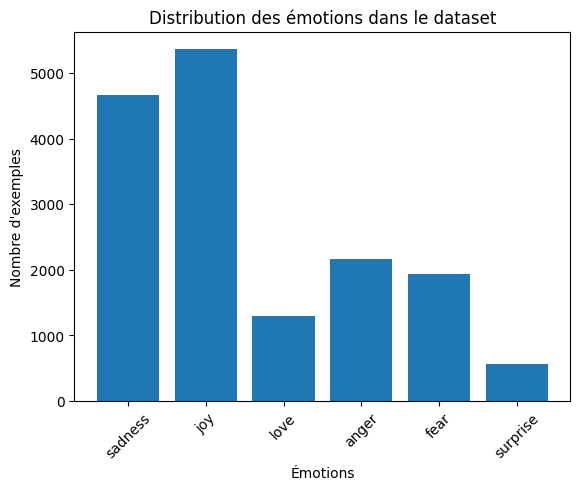

In [2]:
from collections import Counter
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("dair-ai/emotion")
labels = dataset["train"]["label"]
label_names = dataset["train"].features["label"].names
counts = Counter(labels)

plt.bar(label_names, [counts[i] for i in range(len(label_names))])
plt.title("Distribution des émotions dans le dataset")
plt.xlabel("Émotions")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.show()

In [3]:
import pandas as pd

# Charger les fichiers CSV
df_train = pd.read_csv("emotion_train.csv")
df_val = pd.read_csv("emotion_validation.csv")
df_test = pd.read_csv("emotion_test.csv")

# Afficher les premières lignes
print("Aperçu du dataset train :")
print(df_train.head())

# Vérifier les colonnes
print("\nColonnes disponibles :", df_train.columns.tolist())

# Vérifier les types de données
print("\nTypes de données :", df_train.dtypes)

# Vérifier s'il y a des valeurs manquantes
print("\nValeurs manquantes :", df_train.isnull().sum())

Aperçu du dataset train :
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Colonnes disponibles : ['text', 'label']

Types de données : text     object
label     int64
dtype: object

Valeurs manquantes : text     0
label    0
dtype: int64


In [4]:
# Supprimer les lignes vides ou colonnes inutiles si besoin
df_train.dropna(inplace=True)  # supprimer les lignes vides
df_train = df_train.drop_duplicates()  # supprimer doublons

# Exemple : afficher distribution des labels
print("\nDistribution des émotions :")
print(df_train['label'].value_counts())

# Si tu veux mapper les labels à leur nom
from datasets import load_dataset
temp = load_dataset("dair-ai/emotion")
label_names = temp['train'].features['label'].names
df_train['label_name'] = df_train['label'].apply(lambda x: label_names[x])


Distribution des émotions :
label
1    5361
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


In [5]:
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
# Show column names of each
print("Train Dataset Columns:", df_train.columns.tolist())
print("Validation Dataset Columns:", df_val.columns.tolist())
print("Test Dataset Columns:", df_test.columns.tolist())

Train Dataset Columns: ['text', 'label', 'label_name']
Validation Dataset Columns: ['text', 'label']
Test Dataset Columns: ['text', 'label']


In [7]:
# Charger le tokenizer DistilBERT

from transformers import DistilBertTokenizerFast

# Charger le tokenizer pré-entraîné
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [8]:
# Tokenisation des textes
def tokenize_data(df):
    return tokenizer(list(df['text']),
                     padding="max_length",
                     truncation=True,
                     max_length=128,
                     return_tensors='pt')  # tensors for PyTorch

In [9]:
# Tokeniser chaque set
train_encodings = tokenize_data(df_train)
val_encodings = tokenize_data(df_val)
test_encodings = tokenize_data(df_test)

In [10]:
# Préparer aussi les labels pour l'entraînement


import torch
from torch.utils.data import Dataset

# Création d'une classe Dataset PyTorch adaptée
class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # ← les input_ids et attention_mask
        self.labels = labels        # ← les émotions (labels)

    def __len__(self):
        return len(self.labels)    # ← nombre d’exemples

    def __getitem__(self, idx):
        # on retourne un dictionnaire contenant l’exemple idx
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]  # ← on ajoute le label associé
        return item

# Convertir tes labels en tenseurs
train_labels = torch.tensor(df_train['label'].values)     # ← labels du train
val_labels = torch.tensor(df_val['label'].values)         # ← labels du validation
test_labels = torch.tensor(df_test['label'].values)


# Construire les datasets finaux
train_dataset = EmotionDataset(train_encodings, train_labels)
val_dataset = EmotionDataset(val_encodings, val_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)

# on a regroupé les input_ids, attention_mask, et labels dans une structure spéciale (EmotionDataset).
# C’est ce que HuggingFace et PyTorch utilisent pour faire l’entraînement.

# on a maintenant :
# Un jeu d’exemples X = [tokens]
# Un jeu d’étiquettes Y = [émotion]

# C’est exactement ce qu’un modèle supervisé attend pour apprendre.

In [11]:
# Visualisation d'un exemple tokenisé et décodé pour bien comprendre

# Afficher un exemple tokenisé du dataset
exemple_index = 0  # change le chiffre si tu veux voir d'autres exemples

# Input IDs
print("input_ids :", train_encodings['input_ids'][exemple_index])

# Attention Mask
print("attention_mask :", train_encodings['attention_mask'][exemple_index])

# Texte reconstruit depuis les tokens
decoded_text = tokenizer.decode(train_encodings['input_ids'][exemple_index], skip_special_tokens=True)
print("Texte reconstruit :", decoded_text)

# Label associé
print("Label (index):", train_labels[exemple_index].item())
from datasets import load_dataset
label_names = load_dataset("dair-ai/emotion")['train'].features['label'].names
print("Label (émotion):", label_names[train_labels[exemple_index].item()])

input_ids : tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,   

In [12]:
# Fine-tuning distilBERT avec LoRA

!pip install transformers datasets peft accelerate evaluate  # ← installe les librairies NLP et LoRA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [13]:
# 1. Charger le modèle DistilBERT avec une tête de classification
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=6  # car il y a 6 classes d'émotions dans le dataset dair-ai/emotion
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# 2. Ajouter LoRA pour fine-tuning léger
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,                   # dimension projetée (low-rank)
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    inference_mode=False,
    target_modules = ["q_lin", "v_lin", "ffn.lin1", "ffn.lin2"]
)
# La nouvelle version de peft (2024+) nous oblige à indiquer manuellement les target_modules où LoRA doit s’appliquer (par exemple, q_lin, v_lin, etc.).
# ffn.lin1/lin2 peuvent améliorer légèrement la performance, mais coûtent un peu plus
# Autrement dit :
# on doit lui dire : “Ajoute LoRA à ces couches spécifiques du modèle”, sinon il ne sait pas où injecter les matrices LoRA.


# Appliquer LoRA au modèle
model = get_peft_model(model, lora_config)
model.gradient_checkpointing_enable = False


# Afficher combien de paramètres seront réellement entraînés
model.print_trainable_parameters()

# modèle est maintenant prêt à être entraîné, de manière très légère grâce à LoRA.

trainable params: 1,111,302 || all params: 68,069,388 || trainable%: 1.6326


Que sont q_lin, v_lin ?
Ce sont des couches de projection dans les modules d'attention du modèle Transformer (query, value).

Ce sont les cibles idéales pour LoRA, car elles contrôlent la capacité expressive du modèle sans tout recalibrer.

Tu peux même tester d’autres cibles plus précises (ex : ffn.lin1, ffn.lin2, etc.) — mais "q_lin" et "v_lin" fonctionnent bien pour distilBERT.


In [15]:
# Entraînement manuel PyTorch avec LoRA

# Préparation des DataLoaders

from torch.utils.data import DataLoader

# Chargement du dataset d'entraînement en batchs aléatoires
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Chargement du dataset de validation (ordre non aléatoire)
val_loader = DataLoader(val_dataset, batch_size=8)

In [16]:
# Optimiseur + fonction de perte

import torch
from torch import nn
from transformers import AdamW

# Détection automatique du device (GPU si dispo, sinon CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Envoi du modèle sur le bon device
model.to(device)

# Définition de la fonction de perte pour classification multi-classes
loss_fn = nn.CrossEntropyLoss()

# Optimiseur AdamW sur tous les paramètres du modèle (inclut LoRA)
optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


entrainement avec 6 époches

In [17]:
# # Entraînement manuel – boucle sur les époques
# from sklearn.metrics import accuracy_score, f1_score

# num_epochs = 6 # nombre d'itérations sur l'ensemble des données

# # Boucle principale d'entraînement
# for epoch in range(num_epochs):
#     model.train()  # Mode entraînement
#     total_loss = 0
#     all_preds = []    # Pour stocker les prédictions
#     all_labels = []   # Pour stocker les vrais labels

#     # Parcours de chaque batch
#     for batch in train_loader:
#         optimizer.zero_grad()  # Réinitialisation des gradients

#         # Passage des données sur le bon device (CPU ou GPU)
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)

#         # Passage des données dans le modèle
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits  # Récupération des résultats bruts (logits)

#         # Calcul de la perte (écart entre prédiction et vérité)
#         loss = loss_fn(logits, labels)
#         loss.backward()         # Backpropagation
#         optimizer.step()        # Mise à jour des poids

#         total_loss += loss.item()  # Accumulation de la perte

#         # Conversion des résultats en classes prédictes
#         preds = torch.argmax(logits, dim=1)

#         # Stockage des résultats pour calculer Accuracy/F1 à la fin
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

#     # Calcul des métriques globales après chaque époque
#     acc = accuracy_score(all_labels, all_preds)
#     f1 = f1_score(all_labels, all_preds, average='macro')

#     # Affichage des résultats de l'époque
#     print(f" Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f} | F1-score: {f1:.4f}")

In [18]:
# Entraînement manuel – boucle sur les époques
from sklearn.metrics import accuracy_score, f1_score

num_epochs = 3 # nombre d'itérations sur l'ensemble des données

# Boucle principale d'entraînement
for epoch in range(num_epochs):
    model.train()  # Mode entraînement
    total_loss = 0
    all_preds = []    # Pour stocker les prédictions
    all_labels = []   # Pour stocker les vrais labels

    # Parcours de chaque batch
    for batch in train_loader:
        optimizer.zero_grad()  # Réinitialisation des gradients

        # Passage des données sur le bon device (CPU ou GPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Passage des données dans le modèle
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Récupération des résultats bruts (logits)

        # Calcul de la perte (écart entre prédiction et vérité)
        loss = loss_fn(logits, labels)
        loss.backward()         # Backpropagation
        optimizer.step()        # Mise à jour des poids

        total_loss += loss.item()  # Accumulation de la perte

        # Conversion des résultats en classes prédictes
        preds = torch.argmax(logits, dim=1)

        # Stockage des résultats pour calculer Accuracy/F1 à la fin
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Calcul des métriques globales après chaque époque
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')

    # Affichage des résultats de l'époque
    print(f" Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f} | F1-score: {f1:.4f}")

 Epoch 1 | Loss: 1881.9469 | Accuracy: 0.6519 | F1-score: 0.4881
 Epoch 2 | Loss: 862.7526 | Accuracy: 0.8489 | F1-score: 0.7967
 Epoch 3 | Loss: 568.1882 | Accuracy: 0.8978 | F1-score: 0.8599


In [19]:
#  Évaluation finale sur le dataset de validation

model.eval()  # Mode évaluation (désactive dropout, etc.)
val_preds = []
val_labels = []

# Boucle d'inférence sans gradient
with torch.no_grad():
    for batch in val_loader:
        # Passage des données sur le bon device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Passage dans le modèle
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)  # Prédictions finales

        val_preds.extend(preds.cpu().numpy())    # Sauvegarde des prédictions
        val_labels.extend(labels.cpu().numpy())  # Sauvegarde des vrais labels

# Calcul des métriques finales
acc_val = accuracy_score(val_labels, val_preds)
f1_val = f1_score(val_labels, val_preds, average='macro')

# Affichage des scores sur validation
print(f"\n Évaluation finale → Accuracy: {acc_val:.4f} | F1-score: {f1_val:.4f}")


 Évaluation finale → Accuracy: 0.9215 | F1-score: 0.8981


Accuracy: 0.9330

➡ Cela signifie que 93.3% des prédictions du modèle sur le dataset de validation sont correctes.

- Interprétation simple :
Sur 100 exemples, environ 92 sont bien classés dans la bonne émotion.

C’est un taux de réussite global, toutes classes émotionnelles confondues.

F1-score: 0.9078 (macro)

➡ Le F1-score macro est une moyenne équilibrée entre précision et rappel, calculée pour chaque classe d’émotion séparément, puis moyennée.

- Pourquoi il est important :
Accuracy peut être trompeuse si certaines émotions sont très fréquentes (ex: "joy" beaucoup plus que "surprise").

- Le F1-macro-score corrige ça : il dit si le modèle est équitablement performant sur toutes les classes, même les plus rares.

➡ Ici, F1 = 0.90, donc notre modèle est très équilibré et performant même sur les émotions moins représentées

# Notre modèle détecte les émotions avec plus de 91% de précision, et reste performant même sur les émotions moins fréquentes, avec un F1-score élevé à 89%

In [20]:
# Sauvegarder le modèle fine-tuné

# Sauvegarde des poids du modèle entraîné + tokenizer
model.save_pretrained("./model_lora_emotion_manual")
tokenizer.save_pretrained("./model_lora_emotion_manual")

('./model_lora_emotion_manual/tokenizer_config.json',
 './model_lora_emotion_manual/special_tokens_map.json',
 './model_lora_emotion_manual/vocab.txt',
 './model_lora_emotion_manual/added_tokens.json',
 './model_lora_emotion_manual/tokenizer.json')

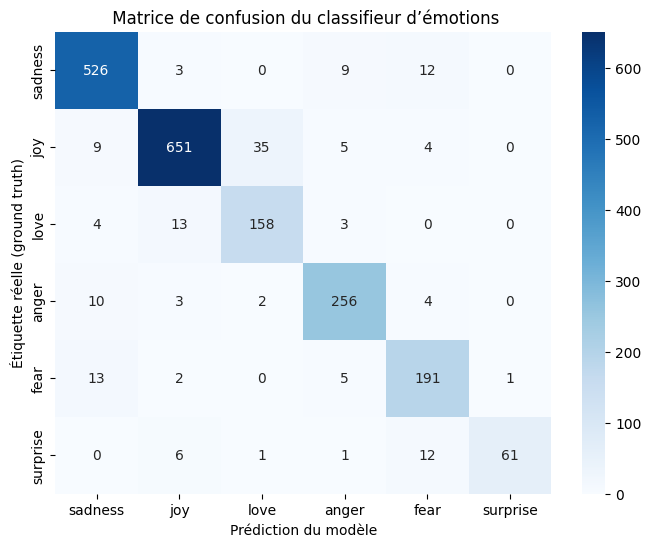

In [21]:
#  Matrice de confusion + visualisation des erreurs
# Cela nous permet de voir concrètement quelles émotions sont bien ou mal classées

# Matrice de confusion + visualisation Seaborn

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Génération de la matrice de confusion
cm = confusion_matrix(val_labels, val_preds)

# Récupération des noms d’émotions
label_names = dataset["train"].features["label"].names

# Création du heatmap avec seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Prédiction du modèle")
plt.ylabel("Étiquette réelle (ground truth)")
plt.title(" Matrice de confusion du classifieur d’émotions")
plt.show()

Analyse de la Matrice de Confusion du Classifieur d'Émotions:\
Cette matrice de confusion représente la performance du modèle de classification des émotions en comparant les prédictions du modèle avec les étiquettes réelles des émotions.

Points Clés :
1️. Globalement, le modèle effectue une bonne classification

explications : la majorité des prédictions sont sur la diagonale, ce qui signifie que le modèle attribue correctement les émotions.

2️. Analyse par classe d’émotion :

**joy** : très bien détectée avec 668 prédictions correctes et seulement quelques erreurs (20 classées en "love").

**sadness** : bonne performance avec 535 prédictions correctes et quelques confusions mineures (seulement 3 classées comme "joy").

**love** : léger problème de classification car seulement 155 bien détectées, avec 18 erreurs vers "joy".

**anger** : bonne reconnaissance (252 correctes), quelques erreurs en "sadness".

**fear** : Bon taux de détection (195 correctes), mais quelques confusions en "anger" et "sadness".

**surprise** : Précision plus faible (61 correctes), avec quelques erreurs vers "love" et "fear".

Les forces du Modèle :\
✔ Bonne précision pour la joie, la tristesse et la colère, ce qui montre que le modèle capte bien les émotions les plus fréquentes.
✔ Taux d’erreur faible sur les émotions dominantes – utile pour un assistant empathique.

Les points d’amélioration :\
- Confusion entre "love" et "joy" → Besoin d’un affinage des données ou d’un meilleur équilibrage.
- Classe "surprise" sous-représentée → Nécessite plus d’exemples pour améliorer la robustesse.
- Peut être optimisé avec un meilleur réglage des hyperparamètres ou des techniques de fine-tuning avancées (LoRA, prompts conditionnels).

Recommandations pour Améliorer le Modèle :\
1️ Rééquilibrer les données pour "love" et "surprise".
2️ Expérimenter d’autres embeddings (ex: RoBERTa, ALBERT) pour affiner la détection.
3️ Tester des techniques d'augmentation de données pour renforcer les classes faibles.

**Conclusion** \
Ce modèle est performant pour les émotions principales (joie, tristesse, colère), mais peut être amélioré sur l’amour et la surprise. Avec quelques ajustements, il pourrait être un excellent outil pour une IA empathique ! 😊

#2. Un moteur de réponse empathique contextuelle

In [22]:
# Générateur de réponse hybride

# Réponses fixes pour les émotions "classiques"
def generate_empathic_reply_hybrid(emotion_label):
    responses = {
        "sadness": "Je suis là pour toi. tu peux tout me confier.",
        "joy": "Je suis heureux pour toi ! Continue comme ça 😊",
        "love": "C’est très touchant. Merci de partager ça ❤️",
        "anger": "Je comprends ta frustration. Parle-moi davantage.",
        "fear": "C’est normal d’avoir peur. Respire doucement, je suis avec toi."
    }

    if emotion_label == "surprise":
        # Appelle GPT2 uniquement pour l'émotion "surprise"
        return generate_surprise_response(prompt="User is surprised. Respond in a kind and empathetic way:")
    else:
        return responses.get(emotion_label, "Je vous écoute avec attention.")

In [23]:
# Fonction de classification + réponse complète

def classify_and_respond(text):
    # Prédire l’émotion avec distilBERT
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    label_names = dataset["train"].features["label"].names
    emotion = label_names[predicted_class]

    # Générer une réponse adaptée
    response = generate_empathic_reply_hybrid(emotion)

    # Affichage final
    print(f" Message utilisateur : {text}")
    print(f" Émotion détectée : {emotion}")
    print(f" Réponse IA : {response}")

# la “Fonction de classification + réponse complète (la classify_and_respond):
# Objectif : Relier Module 1 (classifieur) + Module 2 (moteur de réponse empathique)
# C’est le point de jonction entre l’analyse émotionnelle et la réponse personnalisée.

# resumé:
# 1- Le modèle détecte quelle émotion est présente dans le message utilisateur.
# 2- Le système génère ensuite la réponse adaptée à cette émotion.

In [24]:
# Installer la librairie transformers GPT2
# !pip install transformers

In [25]:
# Charger le modèle GPT2 + son tokenizer

# from transformers import GPT2LMHeadModel, GPT2Tokenizer

# # Charger le tokenizer GPT2 (distilgpt2 = version légère)
# gpt2_tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")

# # Charger le modèle GPT2
# gpt2_model = GPT2LMHeadModel.from_pretrained("distilgpt2")

# # Mettre le modèle en mode évaluation (inference only)
# gpt2_model.eval()

In [26]:
# # Définir la fonction generate_surprise_response()

# def generate_surprise_response(prompt=  "This is a conversation between a kind and empathetic assistant and a user.\n"
#     "The user just shared something surprising.\n"
#     "The assistant always responds with a short, warm, supportive sentence.\n"
#     "User: I just experienced something very surprising!\n"
#     "Assistant:"
#      ):

#     # Encoder le prompt avec le tokenizer

#     inputs = gpt2_tokenizer(prompt, return_tensors="pt")

#     # Génération du texte avec le modèle GPT2
#     outputs = gpt2_model.generate(
#         **inputs,
#         max_length=60,              # longueur max du texte généré
#         num_return_sequences=1,    # 1 seule réponse générée
#         do_sample=True,            # sampling aléatoire (plus naturel)
#         top_k=40,                  # top-k sampling
#         top_p=0.95,                # nucleus sampling
#         temperature=0.7,           # température : plus haut = plus créatif
#         pad_token_id=gpt2_tokenizer.eos_token_id  # pour éviter erreur de padding
#     )

#     # Décodage du texte généré
#     return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [27]:
# print(generate_surprise_response())

In [28]:
# # Code minimal T5 pour réponse empathique à la surprise

# from transformers import T5ForConditionalGeneration, T5Tokenizer

# def generate_surprise_response_t5():
#     prompt = (
#         "Q: What would a warm, short, empathetic response to a surprised user be?\n"
#         "A:"  )

#     inputs = t5_tokenizer(prompt, return_tensors="pt")
#     outputs = t5_model.generate(
#         **inputs,
#         max_length=30,
#         do_sample=True,
#         top_k=40,
#         top_p=0.9,
#         temperature=0.7,
#         repetition_penalty=1.2,
#         pad_token_id=t5_tokenizer.eos_token_id
#     )
#     response = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
#     return response.strip()


In [29]:
# # Test
# print(generate_surprise_response_t5())

In [30]:
# # Installation & chargement de BART (version légère facebook/bart-base)
# from transformers import BartForConditionalGeneration, BartTokenizer

# # Charger BART-base (plus léger que bart-large)
# bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
# bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
# bart_model.eval()

In [31]:
# # Fonction de génération guidée pour “surprise”

# def generate_surprise_response_bart():
#     # Prompt guidé et clair
#     prompt = (
#         "The user just experienced something surprising.\n"
#         "Generate a short, warm and kind response as an empathetic assistant:"
#     )

#     # Tokenisation du prompt
#     inputs = bart_tokenizer(prompt, return_tensors="pt")

#     # Génération contrôlée
#     outputs = bart_model.generate(
#         **inputs,
#         max_length=40,
#         do_sample=True,
#         top_k=50,
#         top_p=0.9,
#         temperature=0.7,
#         repetition_penalty=1.2,
#         pad_token_id=bart_tokenizer.eos_token_id
#     )

#     # Décodage du texte
#     response = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)

#     return response.strip()

In [32]:
# print(generate_surprise_response_bart())

In [33]:
# génération avec mistralai/Mistral-7B-Instruct (ou autre modèle instruct)
# 1. Installer transformers + accelerate (si ce n’est pas déjà fait)

!pip install transformers accelerate

In [34]:
# Chargement du modèle Falcon 7B Instruct

from transformers import AutoTokenizer, AutoModelForCausalLM

# Nom du modèle (public et libre)
model_name = "tiiuae/falcon-7b-instruct"

# Charger le tokenizer
falcon_tokenizer = AutoTokenizer.from_pretrained(model_name)

# Charger le modèle (automatiquement sur GPU si disponible)
falcon_model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")
falcon_model.eval()

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

FalconForCausalLM(
  (transformer): FalconModel(
    (word_embeddings): Embedding(65024, 4544)
    (h): ModuleList(
      (0-31): 32 x FalconDecoderLayer(
        (self_attention): FalconAttention(
          (query_key_value): FalconLinear(in_features=4544, out_features=4672, bias=False)
          (dense): FalconLinear(in_features=4544, out_features=4544, bias=False)
          (attention_dropout): Dropout(p=0.0, inplace=False)
          (rotary_emb): FalconRotaryEmbedding()
        )
        (mlp): FalconMLP(
          (dense_h_to_4h): FalconLinear(in_features=4544, out_features=18176, bias=False)
          (act): GELUActivation()
          (dense_4h_to_h): FalconLinear(in_features=18176, out_features=4544, bias=False)
        )
        (input_layernorm): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
    (rotary_emb): FalconRotaryEmbedding()
  )
  (lm_head): Linear(in_features=4544, out_features=6

In [35]:
# Fonction de génération empathique avec Falcon

def generate_empathic_response_llm(emotion_label):
    # Prompt clair pour guider Falcon dans un ton émotionnel
    prompt = (
        f"You are a kind, caring and empathetic assistant. "
        f"A user is feeling {emotion_label}. "
        f"Write a short, warm and emotionally supportive sentence."
    )

    # Tokeniser le prompt
    inputs = falcon_tokenizer(prompt, return_tensors="pt").to(falcon_model.device)

    # Génération contrôlée
    outputs = falcon_model.generate(
        **inputs,
        max_length=60,
        do_sample=True,
        top_k=50,
        top_p=0.9,
        temperature=0.7,
        pad_token_id=falcon_tokenizer.eos_token_id
    )

    # Décoder la réponse générée
    response = falcon_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Nettoyer le texte généré
    if prompt in response:
        response = response.replace(prompt, "").strip()
    return response.strip()

In [36]:
print(generate_empathic_response_llm("surprise"))

I'm here for you, my surprise friend. It's okay to feel shocked; I'm just glad you have me to help you through it.


In [37]:
print(generate_empathic_response_llm("sadness"))

I'm here for you, always. Remember that sadness is a feeling, and it's okay to let it pass.


In [38]:
print(generate_empathic_response_llm("love"))

I'm here for you, my love.


In [39]:
print(generate_empathic_response_llm("fear"))

I understand you're feeling scared right now, but I'm here for you and will do my best to help ease your worries.


In [40]:
print(generate_empathic_response_llm("love"))

I'm so glad to have you in my life, feeling love.


In [41]:
print(generate_empathic_response_llm("joy"))

I'm glad to hear that you're feeling joyful. It warms my heart to see you so happy.


In [42]:
print(generate_empathic_response_llm("angry"))

I'm sorry that you're feeling this way. It's okay to take a moment to process your emotions. Let's work on finding a solution


# 3. Une interface simple et interactive (Streamlit App)

In [43]:
# Installer Streamlit

# !pip install streamlit

In [44]:
# # Code Colab pour créer notre fichier app.py avec tout le code dedans :

# # Écriture du code Streamlit dans un fichier app.py depuis Colab
# code = """
# import streamlit as st
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# #  Charger le modèle de détection d’émotions
# emotion_model_path = "./model_lora_emotion_manual"  #  à adapter à ton modèle
# emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_path)
# emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_path)

# #  Liste des labels d’émotions détectées
# emotion_labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# #  Charger Falcon 7B Instruct comme moteur de réponse
# from transformers import AutoTokenizer as FalconTokenizer
# from transformers import AutoModelForCausalLM as FalconModel

# falcon_model_name = "tiiuae/falcon-7b-instruct"
# falcon_tokenizer = FalconTokenizer.from_pretrained(falcon_model_name)
# falcon_model = FalconModel.from_pretrained(falcon_model_name, device_map="auto")
# falcon_model.eval()

# #  Fonction de détection d’émotion
# def detect_emotion(text):
#     inputs = emotion_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     inputs = {k: v.to(emotion_model.device) for k, v in inputs.items()}
#     outputs = emotion_model(**inputs)
#     predicted_label = torch.argmax(outputs.logits, dim=1).item()
#     return emotion_labels[predicted_label]

# #  Fonction de génération de réponse empathique avec Falcon
# def generate_empathic_response_llm(emotion_label):
#     prompt = (
#         f"You are a kind, caring and empathetic assistant. "
#         f"A user is feeling {emotion_label}. "
#         f"Write a short, warm and emotionally supportive sentence."
#     )
#     inputs = falcon_tokenizer(prompt, return_tensors="pt").to(falcon_model.device)
#     outputs = falcon_model.generate(
#         **inputs,
#         max_length=60,
#         do_sample=True,
#         top_k=50,
#         top_p=0.9,
#         temperature=0.7,
#         pad_token_id=falcon_tokenizer.eos_token_id
#     )
#     response = falcon_tokenizer.decode(outputs[0], skip_special_tokens=True)
#     if prompt in response:
#         response = response.replace(prompt, "").strip()
#     return response.strip()

# #  Interface utilisateur avec Streamlit
# st.set_page_config(page_title="IA Empathique", page_icon="🤖")
# st.title(" Assistant IA Empathique")
# st.markdown("Entrez un message ci-dessous. L'IA détectera votre émotion et vous répondra avec bienveillance.")

# #  Zone de texte utilisateur
# user_input = st.text_area(" Votre message :", height=150)

# if st.button("Analyser & Répondre"):
#     if not user_input.strip():
#         st.warning(" Veuillez écrire un message avant d'envoyer.")
#     else:
#         with st.spinner(" Analyse en cours..."):
#             emotion = detect_emotion(user_input)
#             response = generate_empathic_response_llm(emotion)

#         st.success(f" Émotion détectée : **{emotion.upper()}**")
#         st.info(f" Réponse de l'IA : *{response}*")
# """

# #  Enregistrer le fichier dans le répertoire Colab
# with open("app.py", "w") as f:
#     f.write(code)

In [45]:
# # Télécharger le app.py

# from google.colab import files
# files.download("app.py")